# Proyecto Final - Análisis descriptivo - geoespacial de los regímenes autoritarios a nivel mundial entre 1900 y 2015

A lo largo del siglo XX y comienzos del XXI, los regímenes autoritarios han sido una forma persistente y diversa de gobierno en distintas regiones del mundo. Desde dictaduras militares hasta autocracias personales o revolucionarias, estos regímenes han mostrado distintas trayectorias de ascenso, consolidación y colapso, dejando huellas profundas en las instituciones políticas y sociales de sus países. Comprender su duración, distribución geográfica y características internas es clave para el análisis comparado de regímenes no democráticos y para reflexionar sobre los factores que explican su resiliencia o caída.

En ese marco, este proyecto busca visibilizar de forma gráfica la duración y distribución histórica de los regímenes autoritarios entre 1900 y 2015, utilizando la base de datos del artículo "Social Revolution and Authoritarian Durability" (Lachapelle et al., 2020). A través de herramientas de visualización en Python (Google Colab), se analizan comparativamente los años de duración de cada régimen por país, junto con la distribución de tipos de régimen (militares, personales, revolucionarios, entre otros), su frecuencia por década, y las correlaciones entre tipo y duración. Asimismo, se incluyen curvas de supervivencia para evaluar la estabilidad relativa de los distintos regímenes y un mapa de calor mundial que representa la distribución geográfica e histórica de las autocracias, con énfasis en los regímenes personales y militares. Esta aproximación gráfica permite una comprensión más accesible y comparativa de los patrones autoritarios en el sistema internacional.

**Integrantes**
  - Salvador Rene Díaz Barreto (20211476)
  - Maria Fernanda Alejo Leiva (20190480)
  - Marianna Elvira Guzmán Sebastián (20200240)
  - José Alexander Salazar López (20203899)
  - Alfredo Ludmir Aro Terleira (20212196)

## 1. Cargamos la data

**¿Qué data utilizamos?**

La base de datos utilizada en este proyecto proviene del artículo “Social Revolution and Authoritarian Durability” (Lachapelle, Levitsky, Way y Casey, 2020), que identifica y clasifica todos los regímenes autoritarios existentes entre 1900 y 2015. El conjunto de datos está construido sobre el reconocido dataset de Geddes, Wright y Frantz (2014; 2018), el cual medía regímenes autoritarios desde 1946 al 2010. Para generar esta nueva base de datos, se le ha agregado una extensión histórica para cubrir todo el siglo XX, así como una clasificación detallada de autocracias revolucionarias.

La base de datos incluye datos de capacidad militar, tipo de régimen, subvariantes del tipo de régimen, capacidad militar, años de duración, etc.

Entre sus características principales, la base incluye:

- Más de 200 regímenes autoritarios, codificados por país y período exacto de duración (inicio y fin en años/fechas).

- Categorización del tipo de régimen, incluyendo regímenes militares, personalistas, de partido único, monárquicos, revolucionarios, entre otros.

- Identificación de autocracias revolucionarias, basadas en criterios como la toma violenta del poder, transformación estatal (particularmente del aparato coercitivo) y ruptura del orden social o geopolítico previo.

- Información desagregada por década, permitiendo análisis temporales de surgimiento y caída.

- Notas cualitativas de contexto político para cada caso, utilizadas para validar la clasificación del régimen.

**Cargar la data**

Primero, utilizaremos la biblioteca **Pandas** para cargar los datos desde el archivo CSV alojado en línea. Para ello, se crea una variable de cadena **ur** que contiene la URL del archivo de datos CSV sin procesar en GitHub. A partir de esto podremos leer el archivo CSV directamente desde la URL en un DataFrame.


In [ ]:
import pandas as pd
revol_reg= pd.read_csv("https://raw.githubusercontent.com/alfredoaroterleira/data/refs/heads/main/revregimes.csv")
revol_reg.head()

,Country,ccode,cus_caseid,cus_syear,cus_smonth,cus_sday,cus_eyear,cus_emonth,cus_eday,cus_t_surv,cus_fail,cus_sr,regimetype,prev_partB,prev_mil,prev_persB,prev_mon,prev_demo,sv_comm,InstalledCom
0,Afghanistan,700,Afghanistan 1919-1929,1919,5,1,1929.0,1.0,14.0,10,1,0,monarchy,0,0,0,0,0,0,0
1,Afghanistan,700,Afghanistan 1929-1973,1929,10,10,1973.0,7.0,17.0,44,1,0,monarchy,0,0,0,1,0,0,0
2,Afghanistan,700,Afghanistan 1973-1978,1973,7,17,1978.0,4.0,27.0,5,1,0,personal,0,0,0,1,0,0,0
3,Afghanistan,700,Afghanistan 1978-1992,1978,4,27,1992.0,4.0,16.0,14,1,0,party-personal,0,0,1,0,0,1,0
4,Afghanistan,700,Afghanistan 1996-2001,1996,9,27,2001.0,11.0,13.0,5,1,1,party-based,0,0,0,0,0,0,0


## 2. Análisis descriptivo

### 2.1. Vemos el resumen estadístico de las variables numéricas

Utilizamos el método describe() para generar estadísticas descriptivas como media, desviación estándar, mínimo, mediana y máximo) del DataFrame:

In [ ]:
revol_reg.describe()

,ccode,cus_syear,cus_smonth,cus_sday,cus_eyear,cus_emonth,cus_eday,cus_t_surv,cus_fail,cus_sr,prev_partB,prev_mil,prev_persB,prev_mon,prev_demo,sv_comm,InstalledCom
count,355.000000,355.000000,355.000000,355.000000,300.000000,300.000000,300.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,420.583099,1961.425352,6.771831,16.183099,1970.680000,6.303333,16.106667,16.121127,0.845070,0.050704,0.092958,0.078873,0.197183,0.053521,0.273239,0.070423,0.028169
std,245.784380,26.593656,3.509679,9.219406,26.326435,3.397519,8.419715,17.759838,0.362348,0.219703,0.290783,0.269921,0.398433,0.225388,0.446252,0.256219,0.165689
min,40.000000,1902.000000,1.000000,1.000000,1904.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,1944.000000,4.000000,8.000000,1950.750000,3.000000,9.750000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,439.000000,1963.000000,7.000000,16.000000,1974.000000,6.000000,16.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,640.000000,1980.000000,10.000000,25.000000,1991.000000,9.000000,23.000000,23.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,850.000000,2014.000000,19.000000,31.000000,2014.000000,12.000000,31.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La duración promedio de los regímenes (cus_t_surv) es de aproximadamente 16 años, con una desviación estándar de 17.7 años, lo que refleja una alta dispersión temporal. Aunque algunos regímenes autoritarios perduraron durante muchas décadas (hasta 95 años), como es el caso de China o Cuba, la mediana es de solo 9 años, lo que indica que la mayoría de los regímenes fueron más breves y que existen casos extremos que elevan la media. Esta diferencia entre la media y la mediana sugiere una distribución sesgada positivamente, con unos pocos regímenes particularmente duraderos.

Esto es coherente con lo planteado por el paper del que la data fue recogida, dado que los regímenes autoritarios, particularmente los personalistas y los regímenes militares, no suelen tener una duración muy alta. En lo que respecto a los valores que aumentan el promedio, los regímenes revolucionarios tienden a tener una resiliencia alta por los cambios que implican tanto en la mentalidad de las élites cómo en el aparato coercitivo del Estado.

Además, el 84.5% de los casos fueron codificados como “fallidos” (cus_fail = 1), lo que indica que la gran mayoría de los regímenes autoritarios terminaron antes de 2015, mientras que el 15.5% aún estaban vigentes en el corte de la muestra. Solo un 5% de los regímenes fueron originados por una revolución social (cus_sr = 1), lo que refuerza la idea de que los regímenes revolucionarios son una minoría dentro del universo autoritario. También se incluyen variables binarias que indican el tipo de régimen anterior, revelando que un 19.7% fueron precedidos por una autocracia personalista, un 9.3% por una de partido, y un 7.9% por una militar, lo que puede facilitar el análisis de patrones de sucesión autoritaria.

### 2.2. Vemos la distribución de tipos de régimen

En cuanto a la distribución por tipo de régimen único, evidenciamos lo siguiente:

In [ ]:
revol_reg['regimetype'].value_counts(dropna=False)

,count
regimetype,
personal,121
military,69
party-based,52
military-personal,32
party-personal,22
monarchy,20
oligarchy,17
party-military,11
indirect military,6


En cuanto a los tipos de régimen, los datos revelan que los **regímenes personalistas** son los más frecuentes, con un total de 121 casos, lo que representa cerca del 34% del total. Le siguen los regímenes militares (69) y los de partido único (52). También aparecen formas híbridas como los militar-personales (32) y partido-personales (22), lo que muestra que las categorías no siempre son excluyentes, y que muchos regímenes combinan elementos de control vertical del poder a través del partido, las fuerzas armadas y el liderazgo individual. Asimismo, se registran 20 monarquías autoritarias, 17 oligarquías, y otras formas menos frecuentes como los regímenes indirectamente militares (6) o combinaciones tripartitas (4), con un único caso sin clasificación (NaN).

Esta distribución sugiere que el personalismo no solo es una forma común sino estructuralmente estable dentro de los regímenes autoritarios del siglo XX y XXI. La presencia significativa de regímenes híbridos indica que las autocracias modernas tienden a adaptarse y adoptar múltiples bases de poder para sostenerse en el tiempo. El hecho de que los regímenes puramente de partido o militares sean menos frecuentes que los personales o híbridos, abre la puerta a explorar cómo el liderazgo centralizado en una figura contribuye a la consolidación o debilitamiento de este tipo de regímenes. Esta clasificación será clave para los análisis visuales de duración, distribución por décadas y curvas de supervivencia.

## 3. Visualizaciones básicas

Utilizaremos matplotlib para la generación de un histograma. Esto con el fin de evaluar visualmente cómo se distribuye la duración de los regímenes autoritarios, mostrando qué duraciones son más comunes y si hay patrones o valores atípicos.

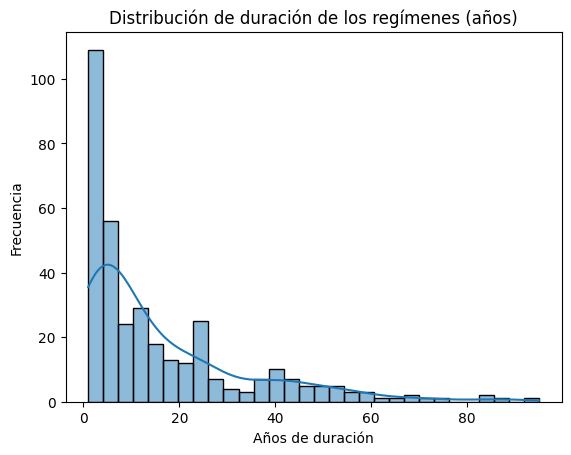

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma del tiempo de supervivencia del régimen
sns.histplot(revol_reg['cus_t_surv'], bins=30, kde=True)
plt.title("Distribución de duración de los regímenes (años)")
plt.xlabel("Años de duración")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra que la forma de la distribución es claramente asimétrica con un fuerte sesgo positivo: la mayoría de los regímenes duran pocos años (menos de 10), mientras que solo unos pocos alcanzan duraciones excepcionales de varias décadas. La presencia de una “cola larga” en la parte derecha del gráfico confirma que estos casos extremos, aunque pocos, tienen un peso considerable en el promedio general. Este tipo de distribución sugiere que la inestabilidad es la norma entre los regímenes autoritarios, con una mayoría que fracasa en consolidarse y perdurar. La existencia de pocos casos que logran superar las barreras del tiempo puede deberse a factores institucionales sólidos, control militar efectivo, apoyo internacional o transformaciones revolucionarias profundas (Lachapelle et al., 2020).

### 3.1. Análisis descriptivo y temporal

Utilizaremos un diagrama de caja para desagregar la duración de los diferentes regímenes autoritarios según su tipo:

/tmp/ipython-input-21-3583941263.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




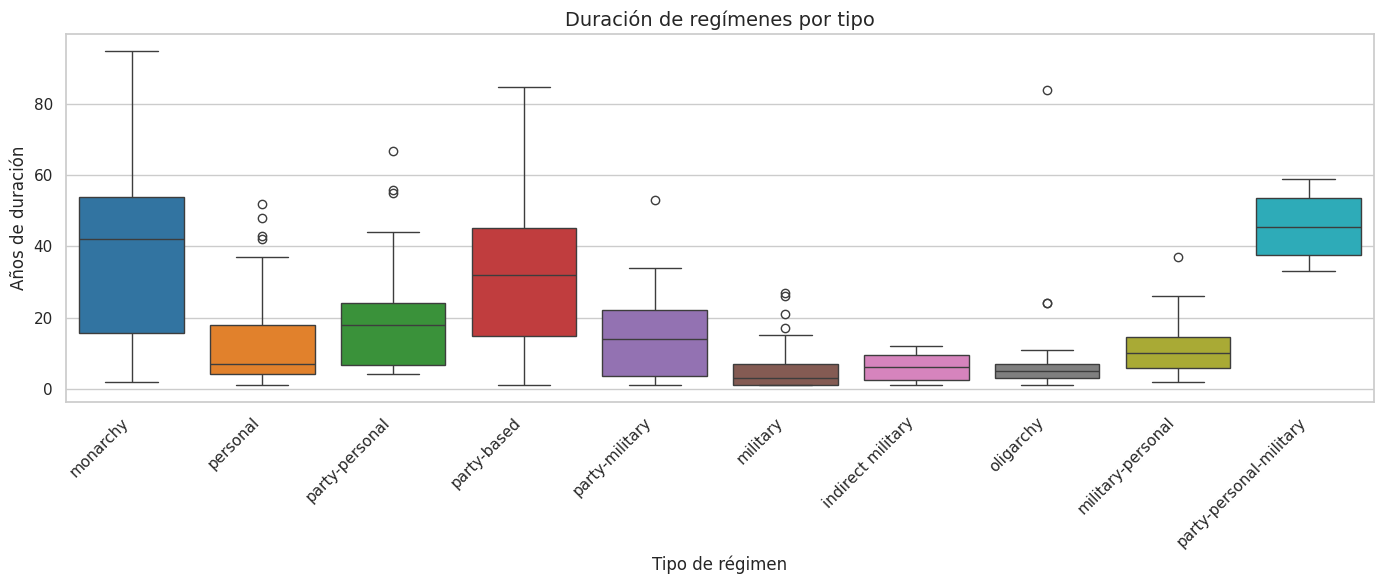

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer estilo
sns.set(style="whitegrid")

# Ajustar tamaño del gráfico
plt.figure(figsize=(14, 6))

# Crear boxplot con colores diferenciados
palette = sns.color_palette("tab10", n_colors=revol_reg['regimetype'].nunique())  # paleta automática

sns.boxplot(
    data=revol_reg,
    x="regimetype",
    y="cus_t_surv",
    palette=palette
)

# Personalización
plt.xticks(rotation=45, ha='right')
plt.title("Duración de regímenes por tipo", fontsize=14)
plt.xlabel("Tipo de régimen")
plt.ylabel("Años de duración")
plt.tight_layout()

plt.show()

Esta desagregación revela importantes diferencias entre categorías. Las monarquías y regímenes tripartitos destacan por su elevada duración media y menor dispersión, lo que sugiere una mayor estabilidad institucional. Por otro lado, los regímenes militares puros, indirectamente militares y oligárquicos son los más breves y variables, reflejando una menor capacidad para consolidarse.

No obstante, una observación destacable es el caso de los regímenes personalistas, que si bien son los más frecuentes en la muestra (34% del total), presentan una duración baja y muchos valores atípicos, evidenciando que su éxito no está necesariamente asociado a su popularidad o frecuencia. La presencia de formas híbridas, como los regímenes party-personal o military-personal, sugiere que la combinación de múltiples fuentes de poder puede mejorar la resiliencia del régimen. Este análisis visual refuerza la hipótesis de que los regímenes más duraderos son aquellos que logran institucionalizar su autoridad o diversificar sus mecanismos de control.

### 3.2. Evolución de regímenes a lo largo del tiempo

Ahora, veamos el número de nuevos regímenes por década:

/tmp/ipython-input-22-3149464417.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




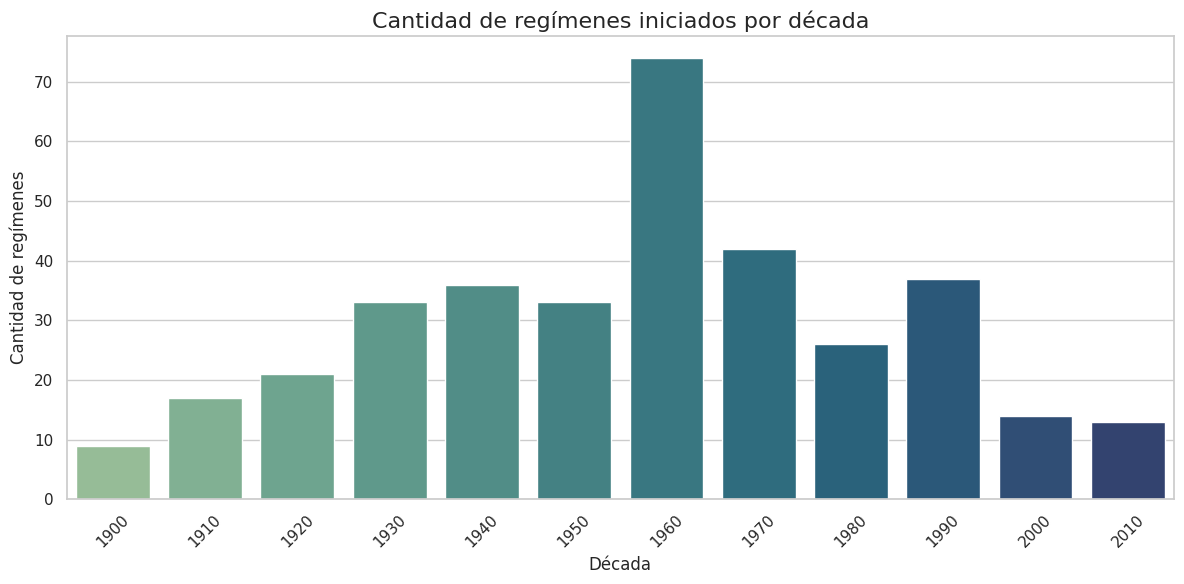

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Preparar datos
decade_counts = revol_reg.groupby('decade').size()

# Crear figura
plt.figure(figsize=(12, 6))

# Gráfico de barras con color personalizado
sns.barplot(
    x=decade_counts.index,
    y=decade_counts.values,
    palette="crest"
)

# Decoraciones
plt.title("Cantidad de regímenes iniciados por década", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Cantidad de regímenes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

El gráfico de barras muestra la cantidad de regímenes políticos iniciados por década desde 1900 hasta 2010, y permite observar patrones significativos en la historia política global. Se destaca un pico notable en la década de 1960, cuando se iniciaron más de 70 regímenes, posiblemente asociado a procesos de descolonización, golpes militares y reconfiguraciones políticas en África, Asia y América Latina.

El contexto de la Guerra Fría en estas décadas presentaba condiciones ideales para el surgimiento de autoritarismos, tanto por el apoyo a los regímenes autoritarios socialistas de parte de la Unión Soviética como por la doctrina estadounidense de la época, en la que el anticomunismo era prioritario por sobre la democracia. El Plan Cóndor y el caso de las repúblicas bananeras son ejemplos notables de esta tendencia. Asimismo, el comunismo se mostraba como una alternativa viable, por lo que el surgimiento de proyectos que intentaban imitar el éxito del marxismo-leninismo no es de extrañar.

 A partir de los años 70 y 80, se observa una tendencia a la baja, aunque con un leve repunte en los años 90, posiblemente vinculado a la caída del bloque soviético y el surgimiento de nuevos Estados. Desde el año 2000, la cantidad de nuevos regímenes ha disminuido considerablemente, lo cual puede interpretarse como una mayor estabilidad política o consolidación de los sistemas existentes, aunque también podría deberse a un menor número de Estados nuevos o a una menor frecuencia de rupturas institucionales. En conjunto, el gráfico refleja cómo los procesos históricos globales impactan directamente en la configuración de los regímenes políticos a lo largo del tiempo.

## 4. Heatmap

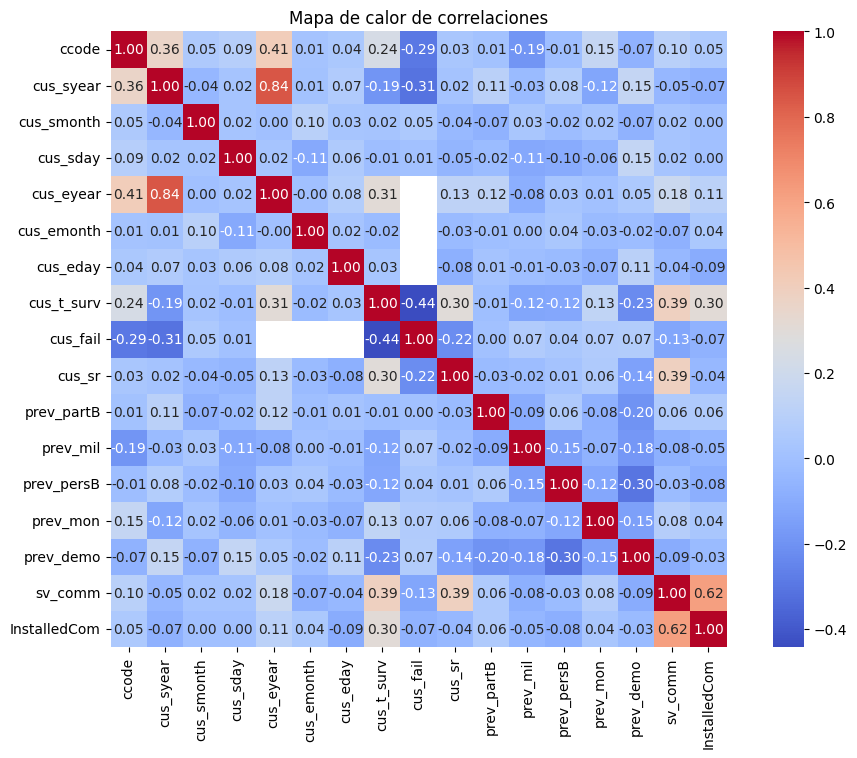

In [ ]:
# Calcular correlaciones solo de variables numéricas
corr = revol_reg.select_dtypes(include=['int64', 'float64']).corr()

# Mapa de calorΩ
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de calor de correlaciones")
plt.show()

## 5. Supervivencia

In [ ]:
!pip install lifelines

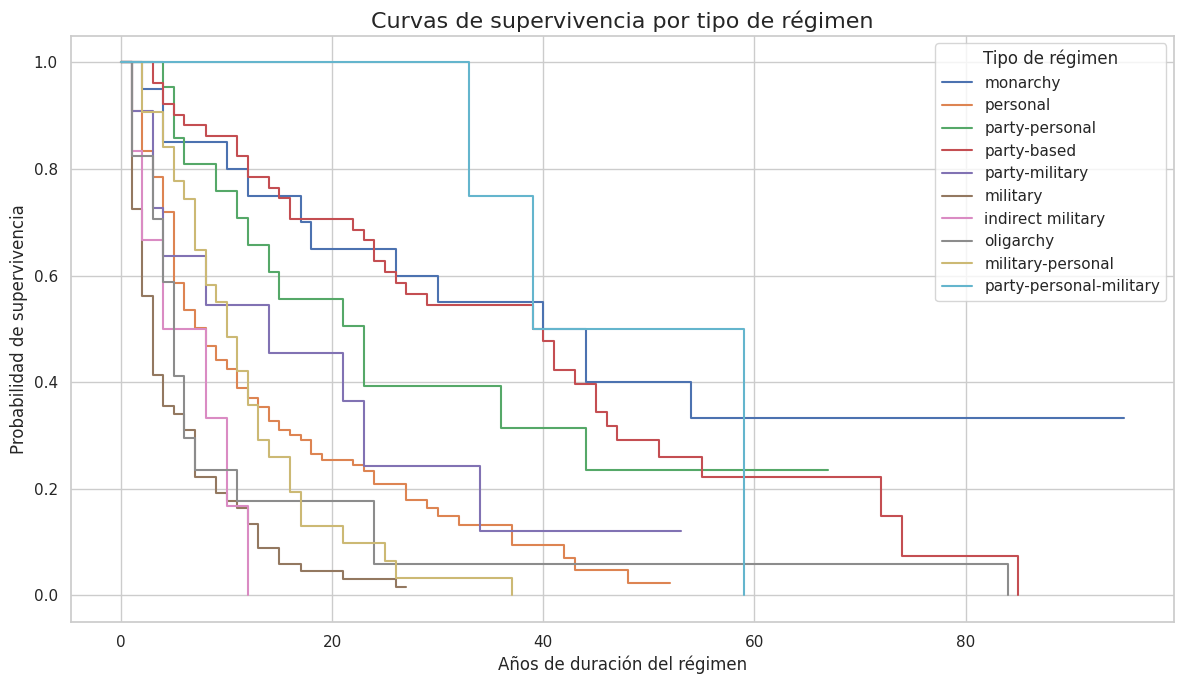

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Inicializamos el modelo
kmf = KaplanMeierFitter()

# Crear la figura
plt.figure(figsize=(12, 7))

# Recorremos cada tipo de régimen
for regime in revol_reg['regimetype'].dropna().unique():
    # Subconjunto de datos por tipo de régimen
    mask = revol_reg['regimetype'] == regime
    sub = revol_reg[mask]

    # Validar que haya datos y que sean numéricos
    if not sub['cus_t_surv'].empty and pd.api.types.is_numeric_dtype(sub['cus_t_surv']):
        # Fit + plot
        kmf.fit(sub['cus_t_surv'], event_observed=sub['cus_fail'], label=regime)
        kmf.plot(ci_show=False)  # ci_show=False oculta la banda de confianza

# Personalización del gráfico
plt.title("Curvas de supervivencia por tipo de régimen", fontsize=16)
plt.xlabel("Años de duración del régimen")
plt.ylabel("Probabilidad de supervivencia")
plt.legend(title="Tipo de régimen")
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra las curvas de supervivencia por tipo de régimen político, revelando diferencias notables en su estabilidad a lo largo del tiempo. Las monarquías destacan por su alta probabilidad de supervivencia incluso después de varias décadas, lo que refleja su fuerte institucionalización y continuidad histórica.

 En contraste, los regímenes militares, tanto puros como combinados (military, indirect military, military-personal), presentan una alta tasa de colapso en los primeros años, evidenciando su fragilidad y dependencia de contextos inestables. Además, este tipo de regimenes suele tener bases de apoyo más limitadas, sumado a que los militares siempre tienen la posibilidad de volver a los cuarteles para resguardar su cohesión.

LoLos regímenes basados en partidos (party-based, party-personal) muestran una supervivencia intermedia, lo que sugiere que la presencia de estructuras partidarias ofrece mayor estabilidad frente a los regímenes personalistas, que tienden a desaparecer rápidamente por la falta de institucionalización. En conjunto, el gráfico sugiere que la duración de un régimen depende en gran medida del tipo de soporte organizacional que lo respalda, siendo más duraderos aquellos con mayor estructura institucional.

## 6. Heatmap mundial por tipo de régimen

In [ ]:
# Filtrar solo regímenes personales y militares
df_filtered = revol_reg[revol_reg['regimetype'].isin(['personal', 'military'])]

# Agrupar y contar
regime_counts = df_filtered.groupby(['Country', 'regimetype']).size().unstack(fill_value=0).reset_index()
regime_counts.head()

regimetype,Country,military,personal
0,Afghanistan,0,2
1,Albania,0,1
2,Argentina,5,1
3,Armenia,0,2
4,Azerbaijan,0,2


In [ ]:
!pip install pycountry
import pycountry

# Función para convertir nombre de país a código ISO-3
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

# Agregar columna con ISO-3
regime_counts['iso_alpha'] = regime_counts['Country'].apply(get_iso3)

# Verifica si hay países que no fueron encontrados
print(regime_counts[regime_counts['iso_alpha'].isnull()])

regimetype          Country  military  personal iso_alpha
12                      CAR         0         5      None
17           Congo Republic         0         2      None
20          Dem. Rep. Congo         0         2      None
37              Ivory Coast         0         2      None
40             Korea, South         1         1      None
62                   Russia         0         1      None
72                   Turkey         2         0      None
77           Vietnam, South         1         1      None


In [ ]:
import plotly.express as px

# Mapa de calor para regímenes personales
fig = px.choropleth(
    regime_counts,
    locations="iso_alpha",
    color="personal",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Distribución mundial de regímenes personales"
)
fig.show()

 El mapa de calor permite visualizar la distribución a nivel mundial de los países que experimentaron regímenes personalistas con mayor frecuencia entre 1900 y 2015.



In [ ]:
import plotly.express as px

fig = px.choropleth(
    regime_counts,
    locations="iso_alpha",
    color="personal",
    hover_name="Country",
    color_continuous_scale="Reds",
    projection="natural earth",  # Estilo de proyección más estética
    title="Concentración histórica de regímenes personales por país",
)

# Mejoras de diseño
fig.update_geos(
    showcoastlines=True, coastlinecolor="gray",
    showland=True, landcolor="whitesmoke",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Centrar título
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar={
        'title': "Cantidad",
        'tickvals': list(range(0, regime_counts['personal'].max()+1)),
        'len': 0.75
    }
)

fig.show()

In [ ]:
# Mapa de calor para regímenes militares
fig = px.choropleth(
    regime_counts,
    locations="iso_alpha",
    color="military",
    hover_name="Country",
    color_continuous_scale="Blues",
    title="Distribución mundial de regímenes militares"
)
fig.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(
    regime_counts,
    locations="iso_alpha",
    color="military",
    hover_name="Country",
    color_continuous_scale="Blues",
    projection="natural earth",
    title="Distribución histórica de regímenes militares por país (1919–2022)"
)

fig.update_geos(
    showcoastlines=True, coastlinecolor="gray",
    showland=True, landcolor="whitesmoke",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar={
        'title': "Cantidad",
        'tickvals': list(range(0, regime_counts['military'].max()+1)),
        'len': 0.75
    }
)

fig.show()